### 현대캐피탈 선수들의 분야별 최근 5년 기록 추세선 그래프 그리기
- 과거 데이터 유무에 따라 표현되는 시즌 개수는 다름

In [1]:
# 불필요한 경고 출력 방지
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
player_record_data_season5 = pd.read_csv("C:/kovo/player_record_data_season5.csv")
player_record_data_season5

,player_name,player_position,player_number,game,season,game_count,set_count,score,attack_succes_percent,bloocking_avg,serve_avg,set_avg,reveive_eff,dig_avg,penalty,mistake
0,김명관,SETTER,NO.3,V리그,19-20[정],26,78,24,47.37,0.13,0.06,3.41,0.00,0.60,0,23
1,김명관,SETTER,NO.3,V리그,20-21[정],29,114,63,45.59,0.20,0.08,10.15,0.00,1.18,0,85
2,김명관,SETTER,NO.3,V리그,21-22[정],33,128,88,35.48,0.37,0.15,10.52,0.00,1.36,0,89
3,김선호,OUTSIDE HITTER,NO.6,V리그,20-21[정],28,102,185,44.94,0.25,0.08,0.14,35.60,1.35,0,87
4,김선호,OUTSIDE HITTER,NO.6,V리그,21-22[정],34,105,162,46.64,0.15,0.07,0.22,37.81,1.14,0,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,허수봉,OPPOSITE SPIKER,NO.7,V리그,18-19[정],27,63,99,45.12,0.19,0.21,0.11,19.12,0.46,0,47
70,허수봉,OPPOSITE SPIKER,NO.7,V리그,20-21[정],26,102,330,49.43,0.28,0.41,0.16,31.07,0.95,0,129
71,허수봉,OPPOSITE SPIKER,NO.7,V리그,21-22[정],36,140,602,52.89,0.25,0.20,0.16,28.83,1.14,0,217
72,홍동선,OUTSIDE HITTER,NO.18,V리그,21-22[정],13,31,64,44.72,0.16,0.13,0.10,39.26,1.03,0,34


### 모든 선수 추세선 그래프 보여주는 함수 생성
- Player_RecordChart_All(csv)
- 인자값으로 csv 파일 받음

In [29]:
# 모든 선수 추세선 그래프 보여주는 함수
def Player_RecordChart_All(csv):
    # 선수별 최근 5년(데이터가 있다면) 분야별 추세선 그래프
    for player in csv["player_name"].unique().tolist()[:] :
        dt = csv.loc[(csv["player_name"]==player)]

        plt.figure(figsize=(9,14),facecolor = "white")

        plt.subplot(4,2,1)
        plt.plot(dt.loc[:,"season"],dt.loc[:,"score"],"--or")
        plt.title("득점", fontsize=15)
        plt.xlabel("시즌")

        plt.subplot(4,2,2)
        plt.plot(dt.loc[:,"season"],dt.loc[:,"attack_succes_percent"],"--or")
        plt.title("공격 성공률", fontsize=15)
        plt.xlabel("시즌")
        # plt.ylabel("공격 성공률")

        plt.subplot(4,2,3)
        plt.plot(dt.loc[:,"season"],dt.loc[:,"bloocking_avg"],"--or")
        plt.title("블로킹 AVG(set)", fontsize=15)
        plt.xlabel("시즌")
        # plt.ylabel("블로킹 AVG(set)")

        plt.subplot(4,2,4)
        plt.plot(dt.loc[:,"season"],dt.loc[:,"serve_avg"],"--or")
        plt.title("서브 AVG(set)", fontsize=15)
        plt.xlabel("시즌")
        # plt.ylabel("서브 AVG(set)")

        plt.subplot(4,2,5)
        plt.plot(dt.loc[:,"season"],dt.loc[:,"set_avg"],"--or")
        plt.title("세트 AVG(set)", fontsize=15)
        plt.xlabel("시즌")
        # plt.ylabel("세트 AVG(set)")
        
        plt.subplot(4,2,6)
        plt.plot(dt.loc[:,"season"],dt.loc[:,"reveive_eff"],"--or")
        plt.title("리시브 효율", fontsize=15)
        plt.xlabel("시즌")
        # plt.ylabel("리시브 효율")
        
        plt.subplot(4,2,7)
        plt.plot(dt.loc[:,"season"],dt.loc[:,"dig_avg"],"--or")
        plt.title("디그 AVG(set)", fontsize=15)
        plt.xlabel("시즌")
        # plt.ylabel("디그 AVG(set)")

        plt.subplot(4,2,8)
        plt.plot(dt.loc[:,"season"],dt.loc[:,"mistake"],"--or")
        plt.title("범실", fontsize=15)
        plt.xlabel("시즌")


        # subplot 전체 제목 설정
        plt.suptitle(player+"선수 시즌별 기록",fontsize=25)

        plt.subplots_adjust(hspace=0.7,wspace=0.2)
        plt.show()


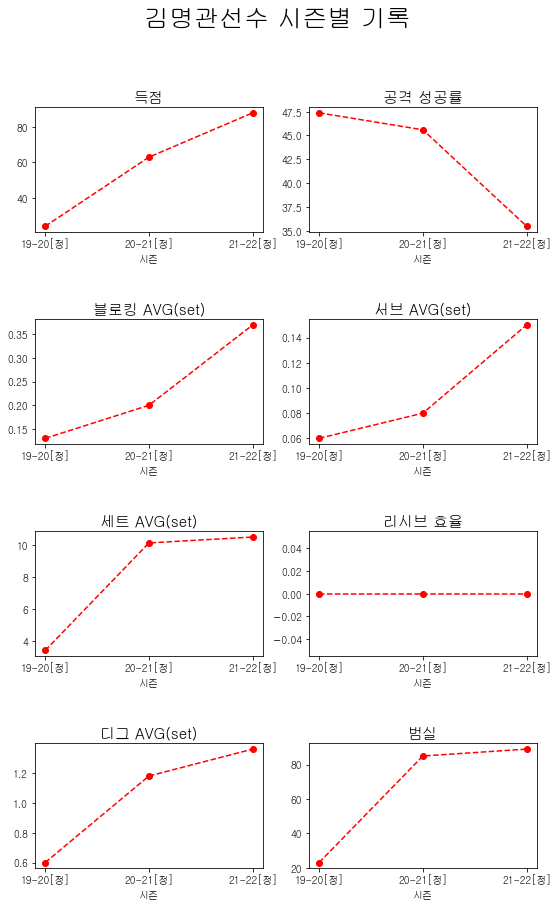

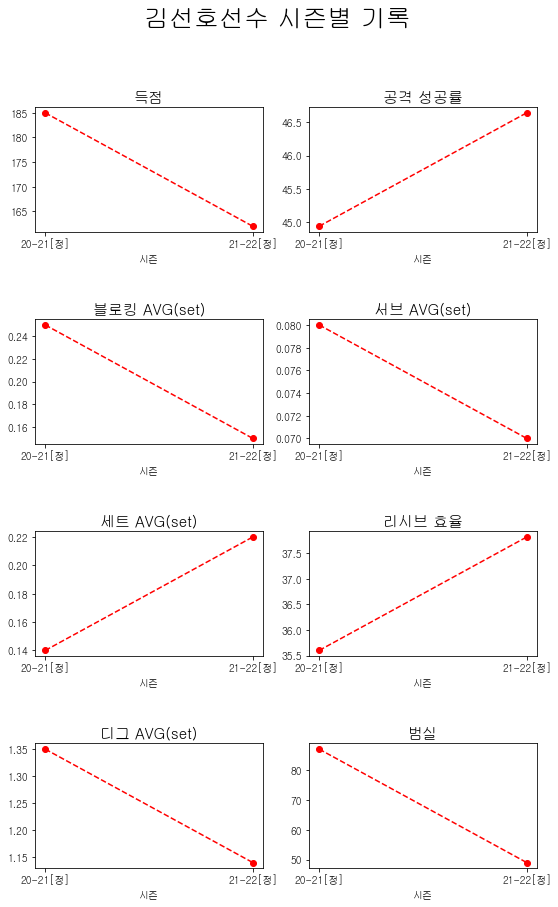

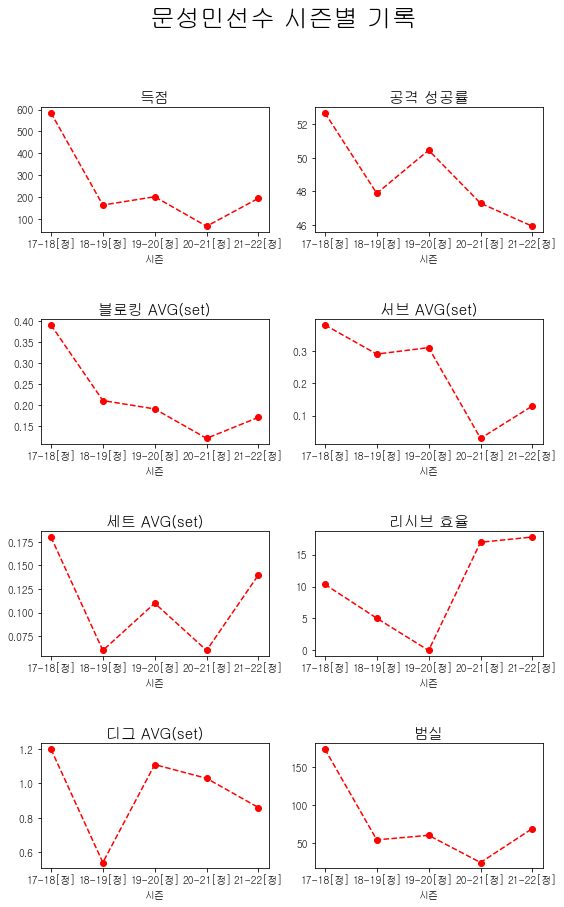

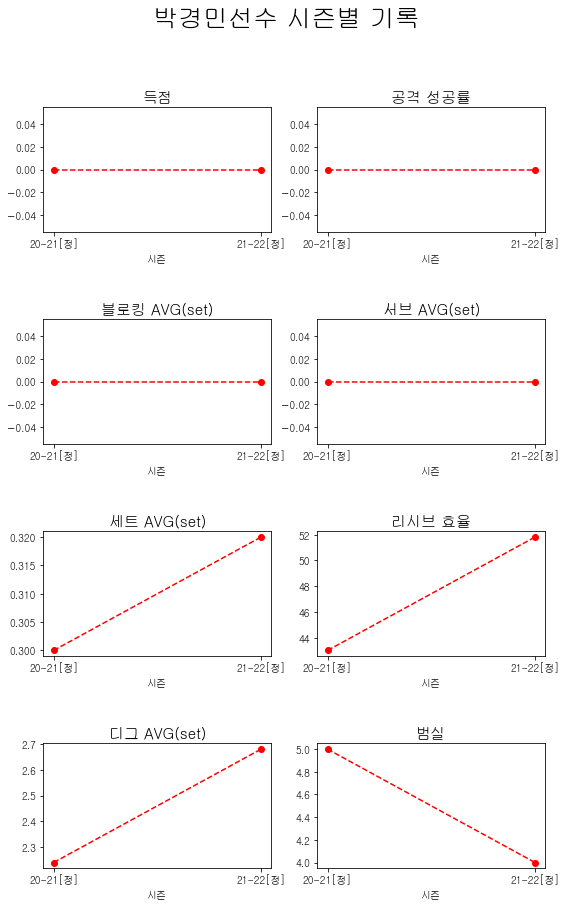

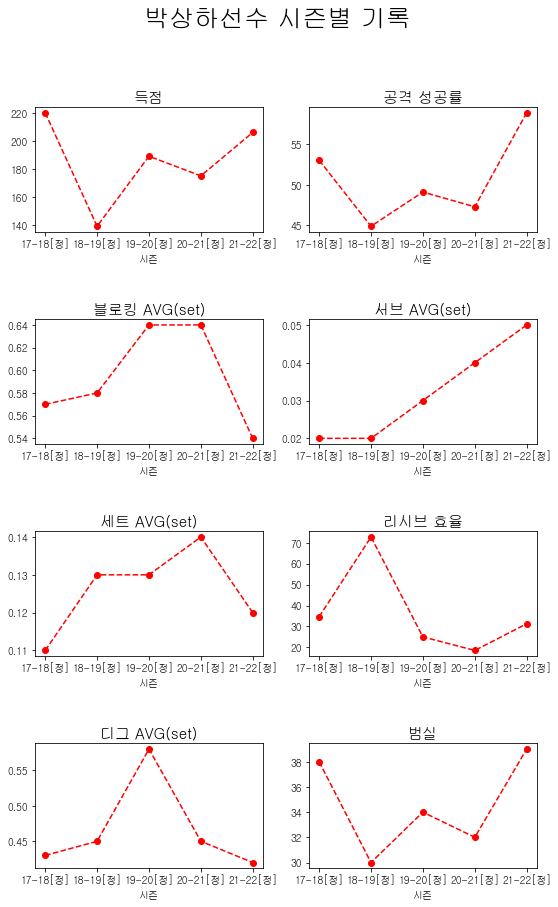

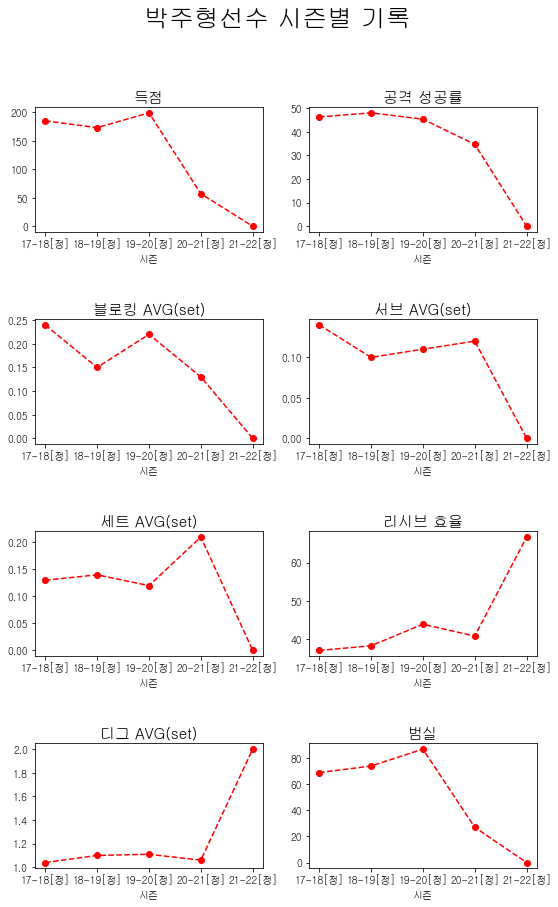

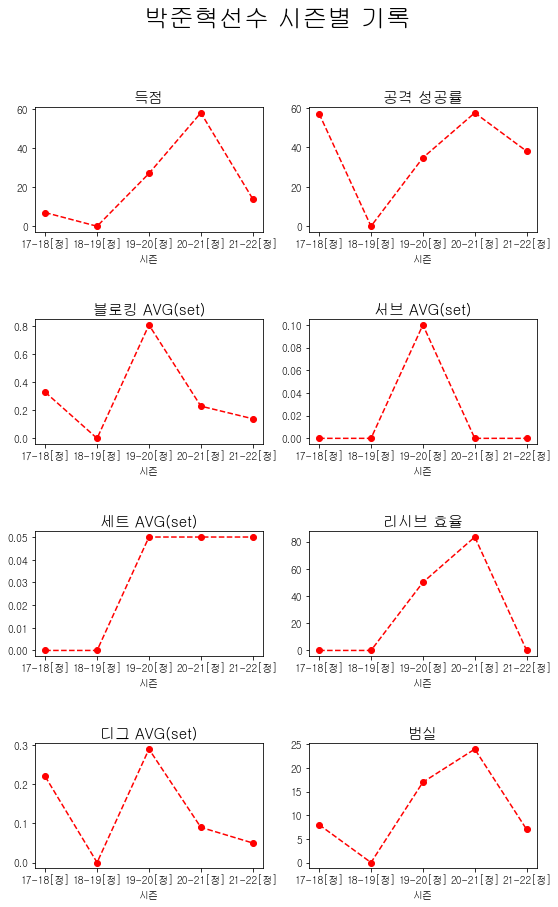

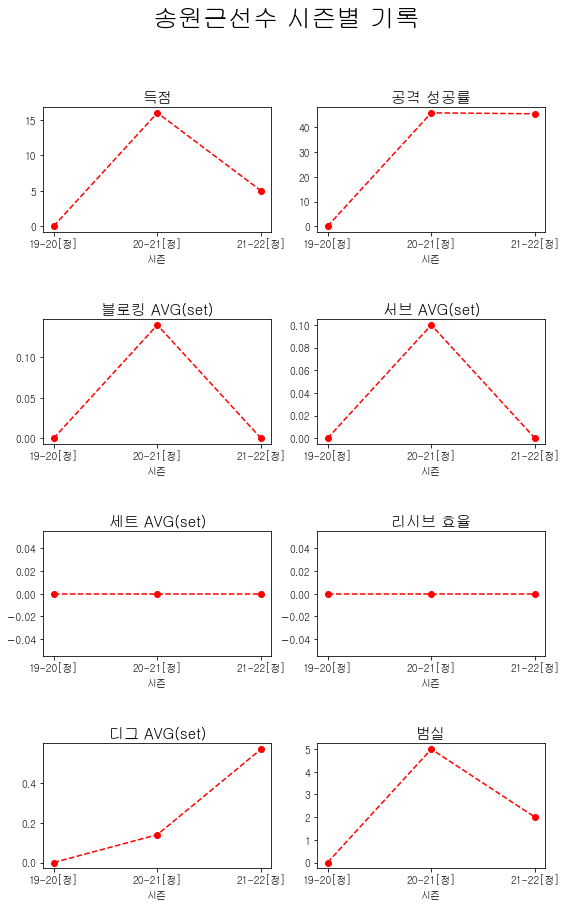

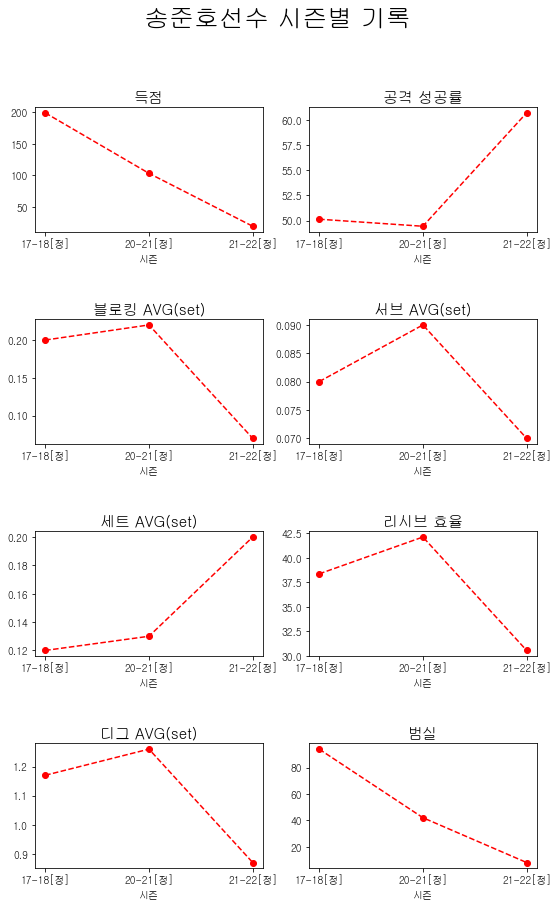

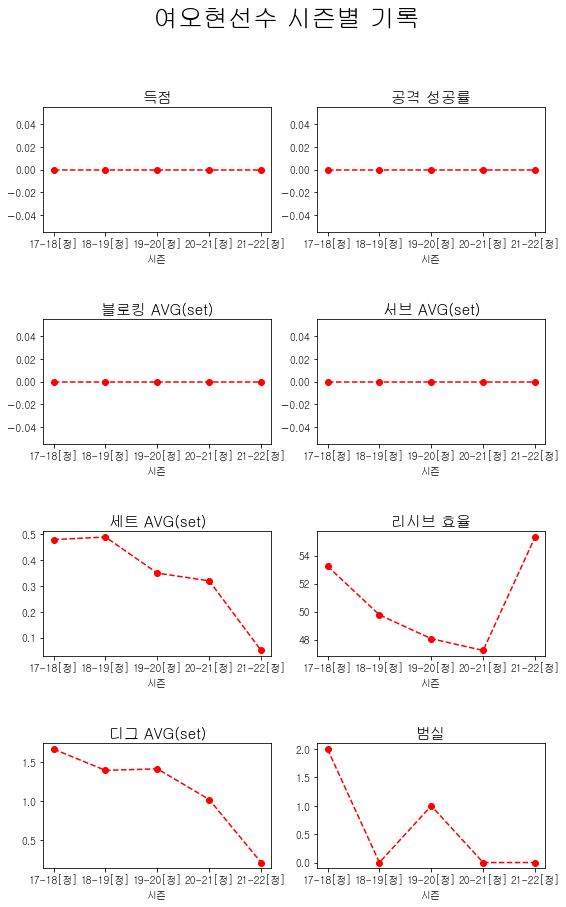

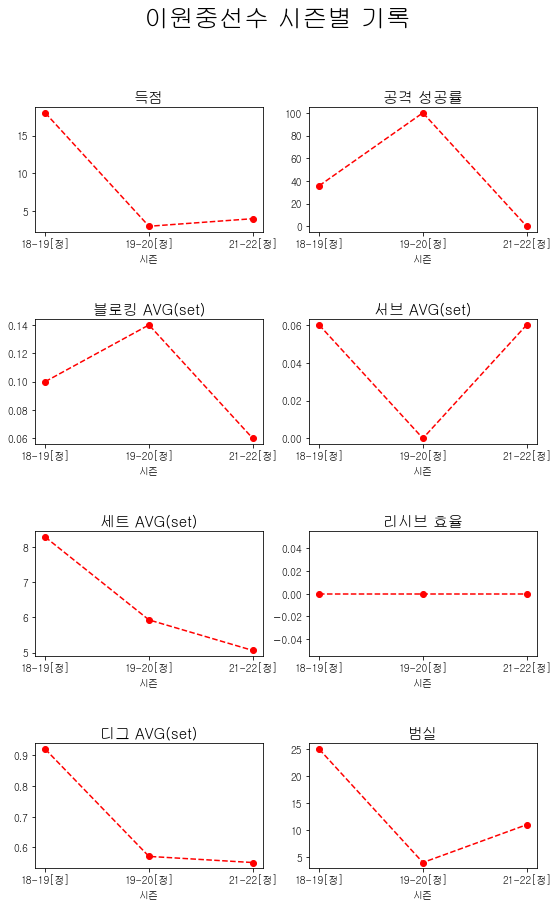

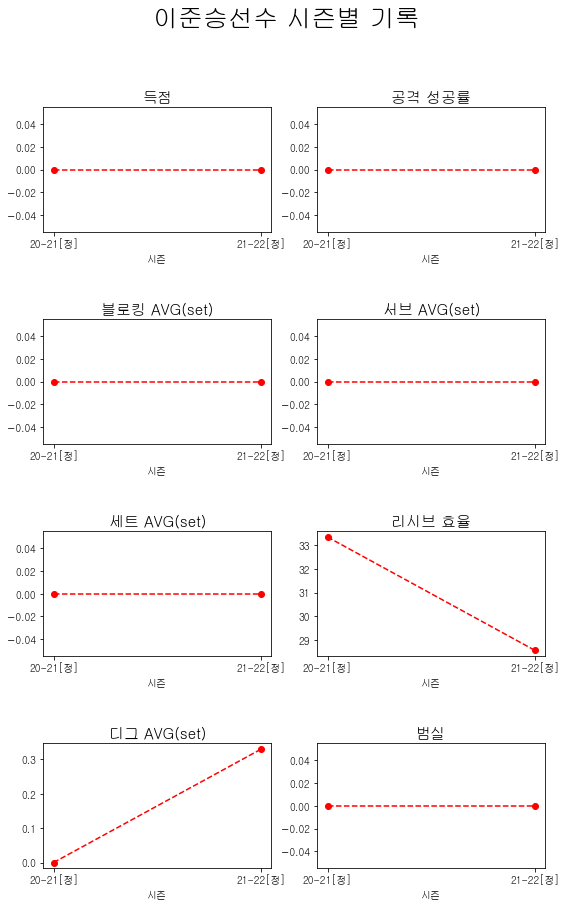

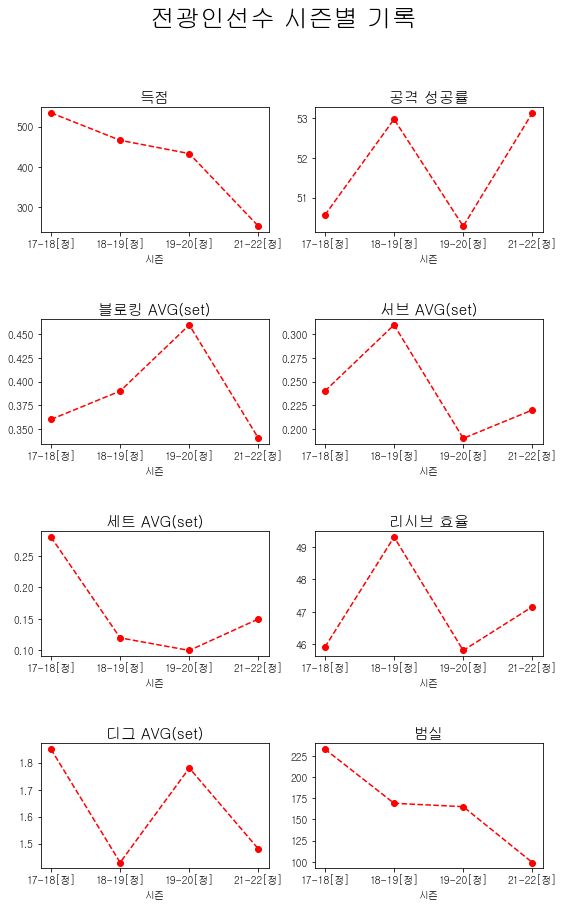

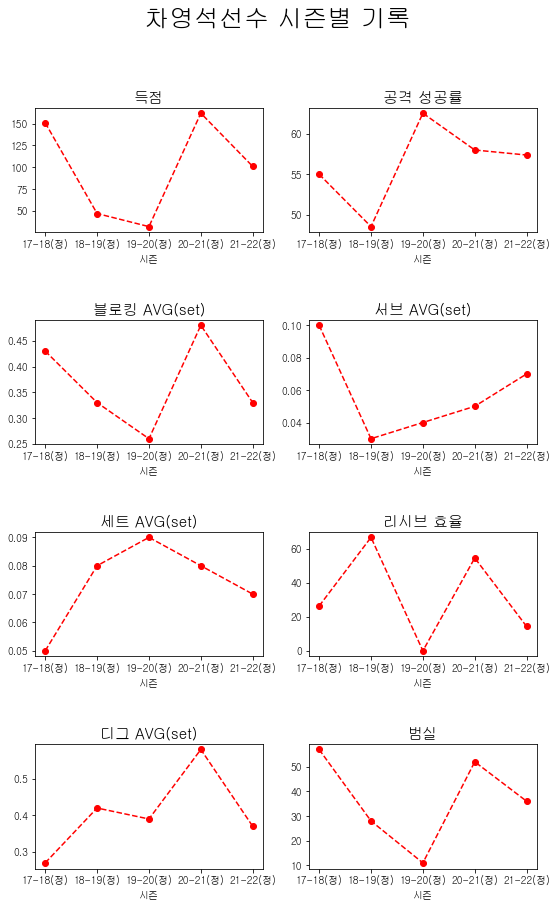

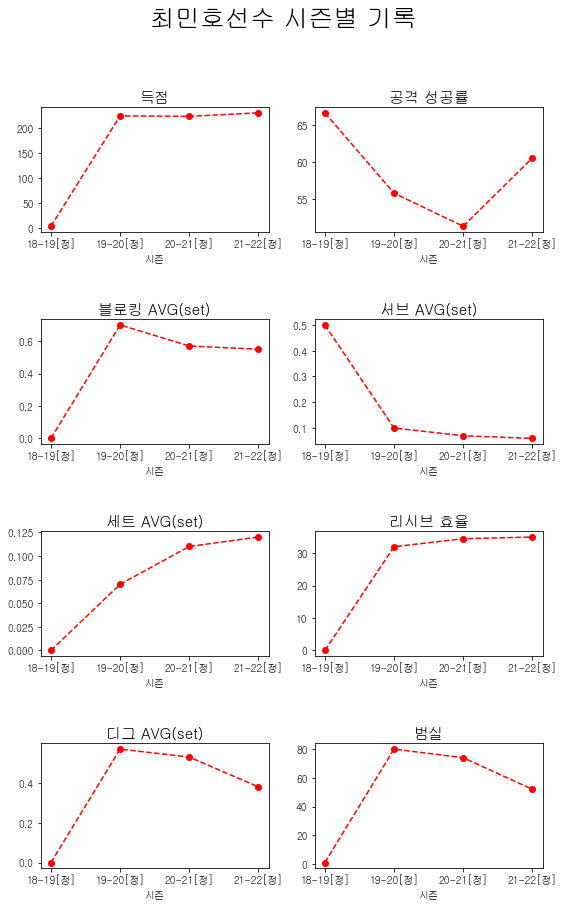

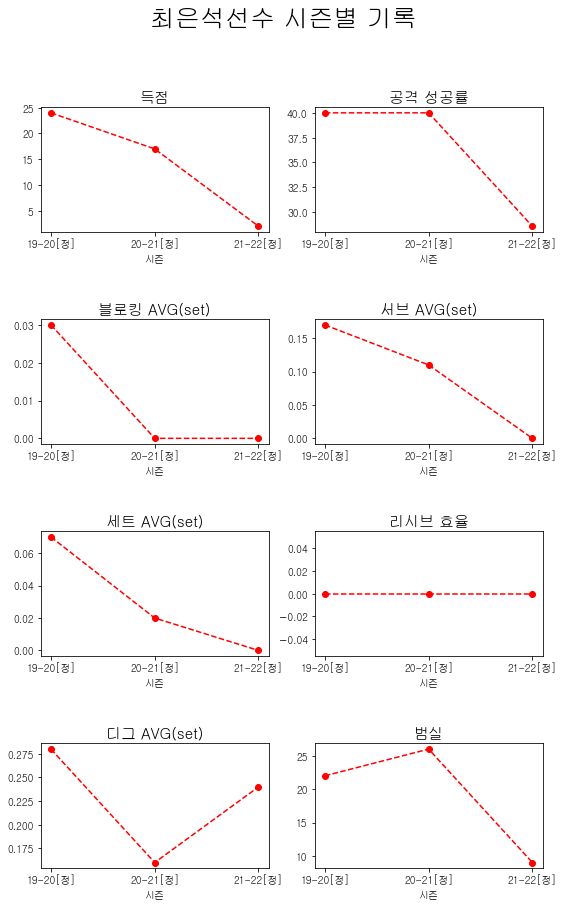

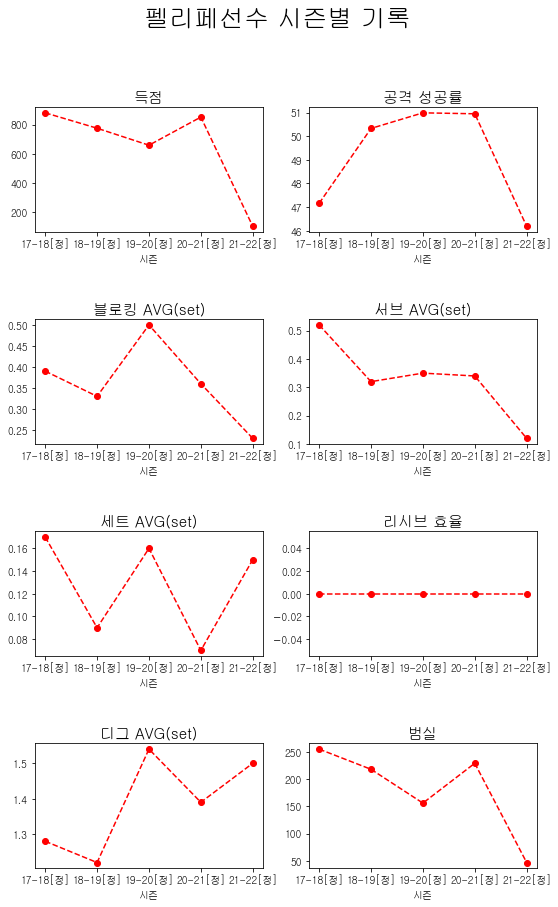

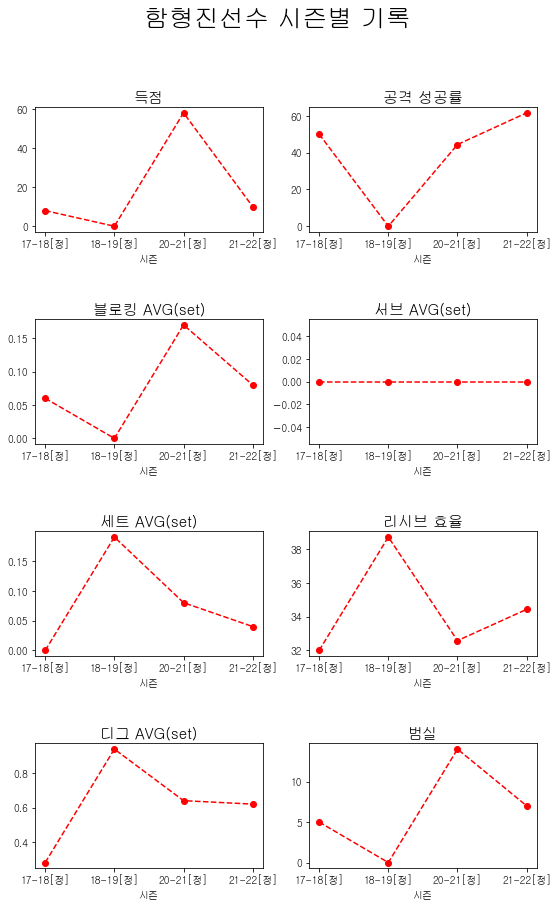

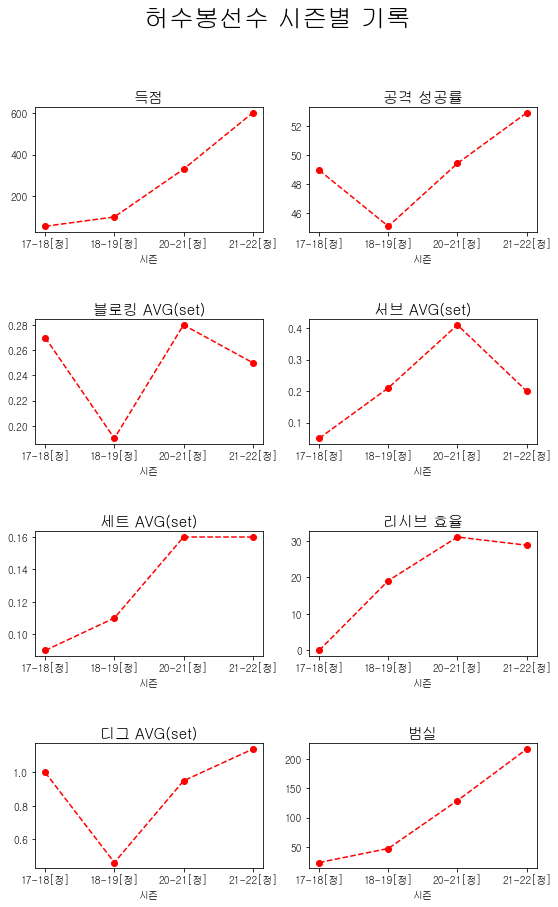

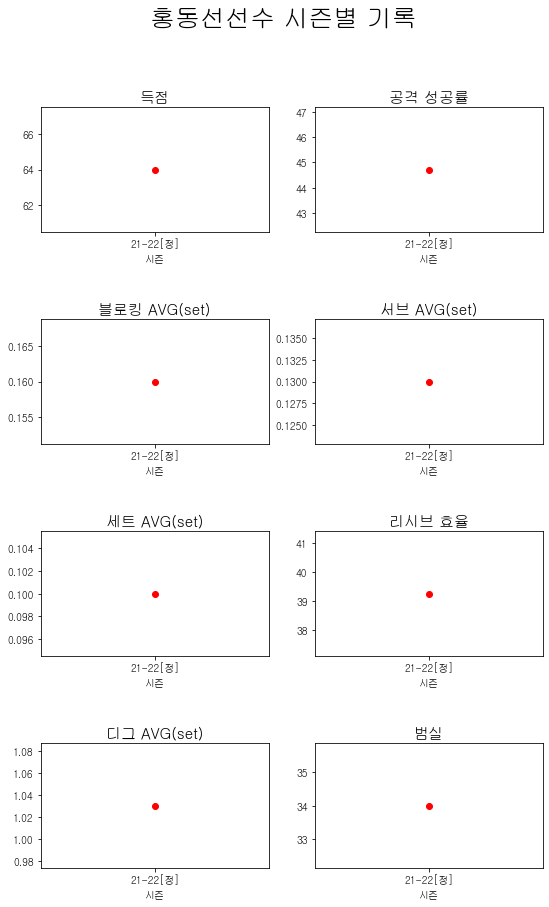

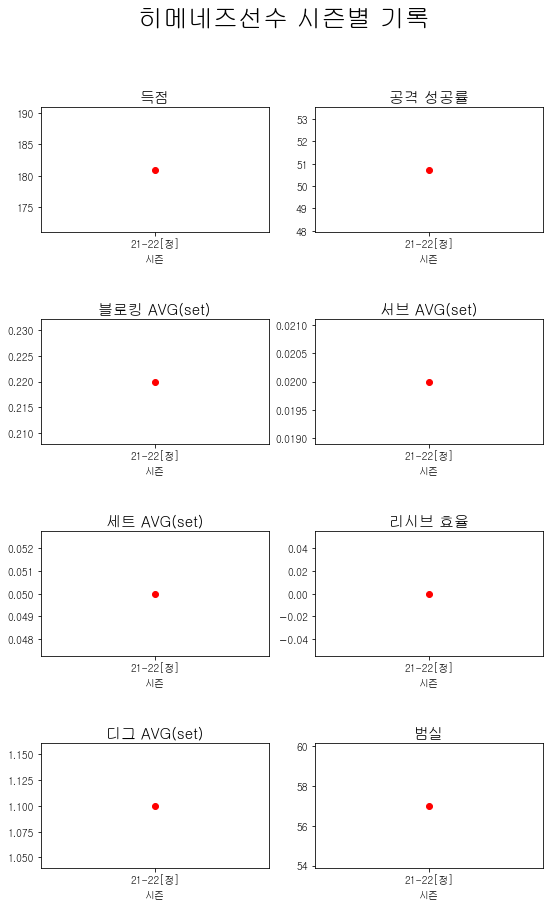

In [30]:
Player_RecordChart_All(player_record_data_season5)

### 선수 지정해서 해당 선수 추세선 그래프 보여주는 함수 생성
- Player_RecordChart_One(csv, name)
- 인자값으로 csv 파일, 선수명 받음

In [34]:
# 해당 선수 추세선 그래프 보여주는 함수
def Player_RecordChart_One(csv,name):
    # 선수별 최근 5년(데이터가 있다면) 분야별 추세선 그래프
    # for player in csv["player_name"].unique().tolist()[:] :
        dt = csv.loc[(csv["player_name"]==name)]

        plt.figure(figsize=(9,14),facecolor = "white")

        plt.subplot(4,2,1)
        plt.plot(dt.loc[:,"season"],dt.loc[:,"score"],"--or")
        plt.title("득점", fontsize=15)
        plt.xlabel("시즌")

        plt.subplot(4,2,2)
        plt.plot(dt.loc[:,"season"],dt.loc[:,"attack_succes_percent"],"--or")
        plt.title("공격 성공률", fontsize=15)
        plt.xlabel("시즌")
        # plt.ylabel("공격 성공률")

        plt.subplot(4,2,3)
        plt.plot(dt.loc[:,"season"],dt.loc[:,"bloocking_avg"],"--or")
        plt.title("블로킹 AVG(set)", fontsize=15)
        plt.xlabel("시즌")
        # plt.ylabel("블로킹 AVG(set)")

        plt.subplot(4,2,4)
        plt.plot(dt.loc[:,"season"],dt.loc[:,"serve_avg"],"--or")
        plt.title("서브 AVG(set)", fontsize=15)
        plt.xlabel("시즌")
        # plt.ylabel("서브 AVG(set)")

        plt.subplot(4,2,5)
        plt.plot(dt.loc[:,"season"],dt.loc[:,"set_avg"],"--or")
        plt.title("세트 AVG(set)", fontsize=15)
        plt.xlabel("시즌")
        # plt.ylabel("세트 AVG(set)")
        
        plt.subplot(4,2,6)
        plt.plot(dt.loc[:,"season"],dt.loc[:,"reveive_eff"],"--or")
        plt.title("리시브 효율", fontsize=15)
        plt.xlabel("시즌")
        # plt.ylabel("리시브 효율")
        
        plt.subplot(4,2,7)
        plt.plot(dt.loc[:,"season"],dt.loc[:,"dig_avg"],"--or")
        plt.title("디그 AVG(set)", fontsize=15)
        plt.xlabel("시즌")
        # plt.ylabel("디그 AVG(set)")

        plt.subplot(4,2,8)
        plt.plot(dt.loc[:,"season"],dt.loc[:,"mistake"],"--or")
        plt.title("범실", fontsize=15)
        plt.xlabel("시즌")


        # subplot 전체 제목 설정
        plt.suptitle(name+"선수 시즌별 기록",fontsize=25)

        plt.subplots_adjust(hspace=0.7,wspace=0.3)
        plt.show()

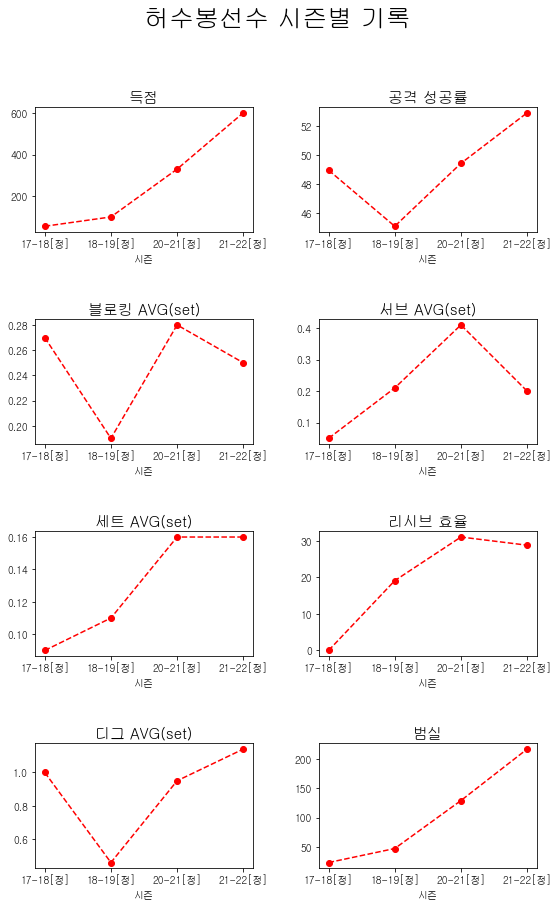

In [35]:
Player_RecordChart_One(player_record_data_season5,"허수봉")

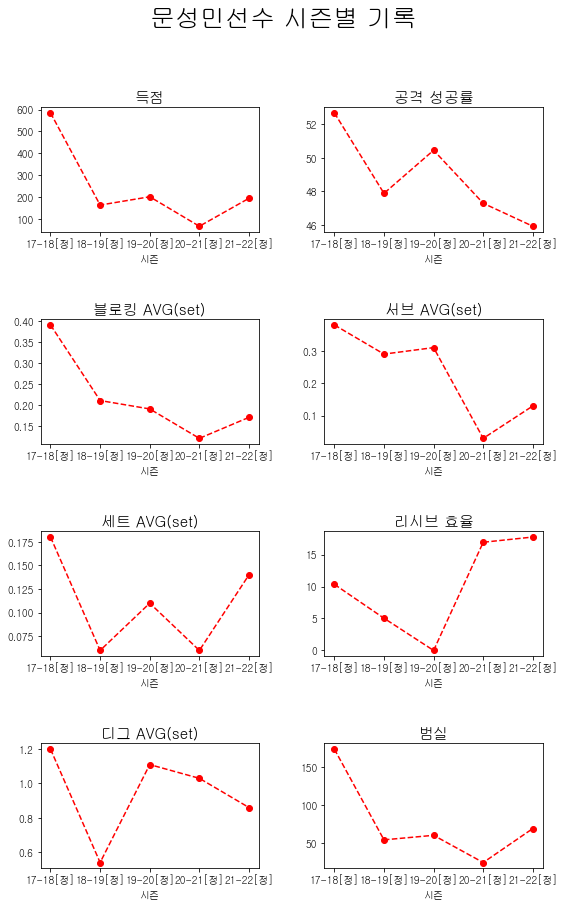

In [36]:
Player_RecordChart_One(player_record_data_season5,"문성민")